In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data
clinical_trial_data

# Combine the data into a single dataset
combine_mouse_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")


# Display the data table for preview
combine_mouse_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [47]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean = combine_mouse_data.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]

df = tumor_response_mean.reset_index()
# Convert to DataFrame

# Preview DataFrame
df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [48]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_sem = combine_mouse_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
df_SError = tumor_response_sem.sem().reset_index()
# Preview DataFrame
df_SError.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [29]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [49]:

tumor_response_pivot_mean = df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


tumor_response_pivot_sem = df_SError.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_response_pivot_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


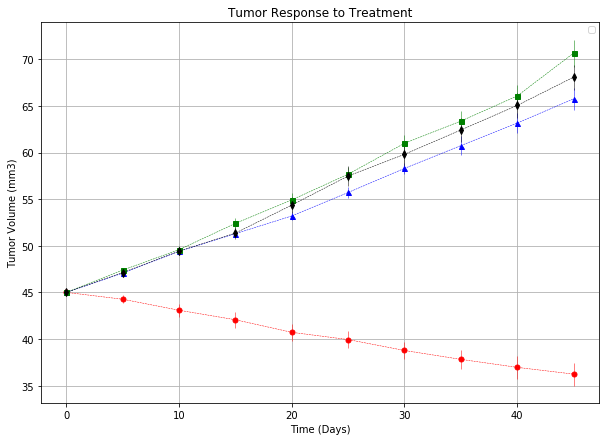

In [50]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))


plt.errorbar(tumor_response_pivot_mean.index, tumor_response_pivot_mean["Capomulin"], yerr=tumor_response_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_response_pivot_mean.index, tumor_response_pivot_mean["Infubinol"], yerr=tumor_response_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_response_pivot_mean.index, tumor_response_pivot_mean["Ketapril"], yerr=tumor_response_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_response_pivot_mean.index, tumor_response_pivot_mean["Placebo"], yerr=tumor_response_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

plt.savefig("analysis/Fig1.png")


In [51]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [52]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = combine_mouse_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)
# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [53]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = combine_mouse_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [54]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
tumor_response_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


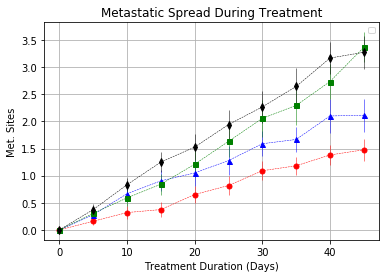

In [55]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("analysis/Fig2.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [56]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = combine_mouse_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count}).reset_index()
# Preview DataFrame
survival_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [57]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
survival_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


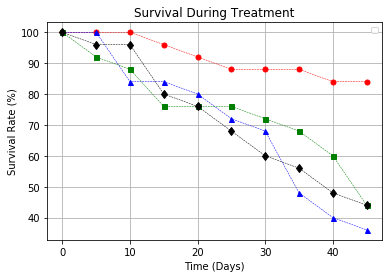

In [58]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("analysis/Fig3.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [59]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_response_pivot_mean.iloc[-1] - tumor_response_pivot_mean.iloc[0]) / tumor_response_pivot_mean.iloc[0]
tumor_pct_change_sem =  100 * (tumor_response_pivot_sem.iloc[-1] - tumor_response_pivot_sem.iloc[0]) / tumor_response_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

NameError: name 'autolabelPass' is not defined

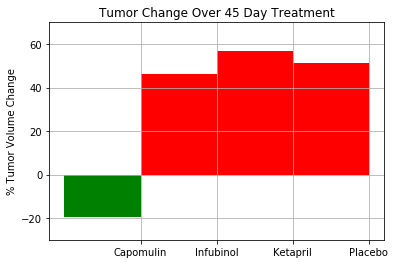

In [62]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)



# Save the Figure
fig.savefig("analysis/Fig4.png")

#how the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)